In [69]:
import pandas as pd
import numpy as np
from random import shuffle
from pyramid import auto_arima

import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.arima_model import ARIMA


In [2]:
drct = '/home/somayeh/Documents/Career/Data_Incubator/Project/'

In [3]:
import pickle

filename = drct+'citation_hist_Y02'
with open(filename, 'rb') as f:
    citation_hist, YY = pickle.load(f)

In [4]:
citation_hist.keys()

dict_keys(['Y02B', 'Y02A', 'Y02W', 'Y02P', 'Y02E', 'Y02T', 'Y02C', 'Y02D'])

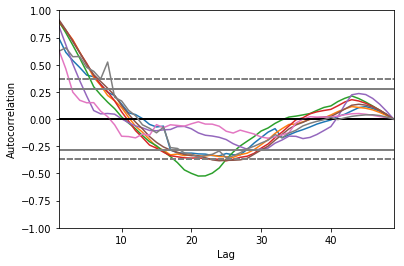

In [5]:
# autocorrelation_plot(citation_hist['H04B'])
for hkey in citation_hist.keys():
    autocorrelation_plot(citation_hist[hkey])
plt.show()


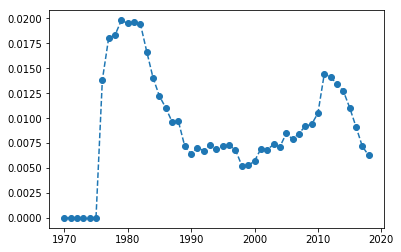

In [6]:
plt.plot(YY[1][:-1],np.divide(citation_hist['Y02E'],YY[0]), 'o--')

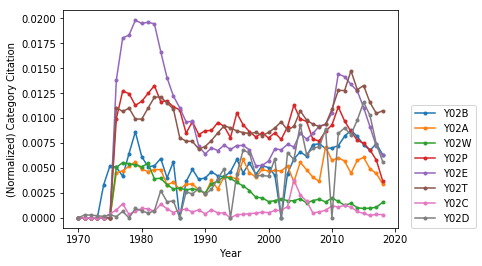

In [76]:
for hkey in citation_hist.keys():
    Y1 = citation_hist[hkey]
#     if len(H04_group[hkey])>50000:
    h = np.divide(Y1,YY[0])
    plt.plot(YY[1][:-1],h, '.-', label=hkey)
    plt.xlabel('Year')
    plt.ylabel('(Normalized) Category Citation')
    plt.legend(loc=(1.04,0))
# plt.show()
plt.savefig(drct+'Y.png', bbox_inches="tight")

In [7]:
# fit model
model = ARIMA(np.divide(citation_hist['Y02E'],YY[0]), order=(8,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())


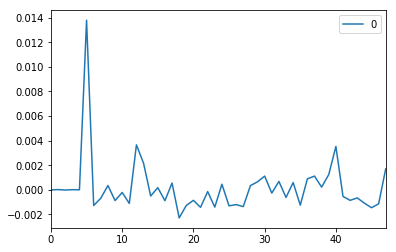

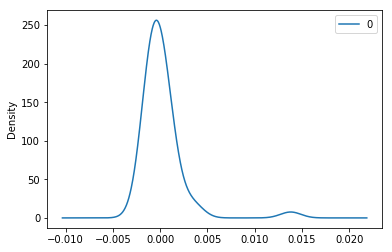

               0
count  48.000000
mean    0.000173
std     0.002348
min    -0.002293
25%    -0.001097
50%    -0.000186
75%     0.000557
max     0.013795


In [9]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [10]:
citation_hist_all =  []
Keys = list(citation_hist.keys())
for key in Keys[:-1]:
    citation_hist_all.append(list(np.divide(citation_hist[key],YY[0])))
#     citation_hist_all.append([])
shuffle(citation_hist_all)
citation_hist_all = [item for sublist in citation_hist_all for item in sublist]    
citation_hist_all    

[4.782675237220692e-06,
 3.4245226643471235e-06,
 1.6115983510125672e-06,
 1.4992144116482962e-06,
 5.3414523408914886e-06,
 8.98396490606623e-06,
 0.005065725256606951,
 0.0055473140708499945,
 0.005438630445061258,
 0.005301305224642198,
 0.005129677242205637,
 0.005464955283654518,
 0.003930361124800555,
 0.003973059834498017,
 0.0033153239206789847,
 0.0029019710201669767,
 0.0029859992672289152,
 0.0028150584044120165,
 0.0029255024748169583,
 0.002797560554974901,
 0.0025018835711435113,
 0.003398666157102989,
 0.0036877483203205286,
 0.004155183646049018,
 0.003952850867662934,
 0.003556514060646772,
 0.0032079678795780492,
 0.002737260449582723,
 0.002056060687801688,
 0.002018209744258485,
 0.0016356280394261595,
 0.0017301642417777445,
 0.0019048652236062895,
 0.0017341905434665394,
 0.0017216645809835385,
 0.0019336207609218046,
 0.0014962644770781736,
 0.0017451003823489224,
 0.0018722419426522377,
 0.0016032738392991986,
 0.0019897431910885113,
 0.0016575752629694805,
 0.0

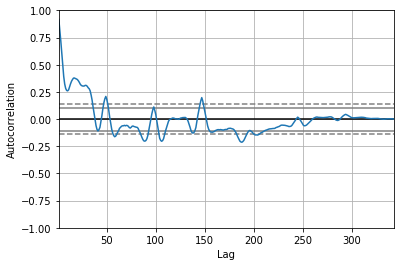

In [11]:
autocorrelation_plot(citation_hist_all)


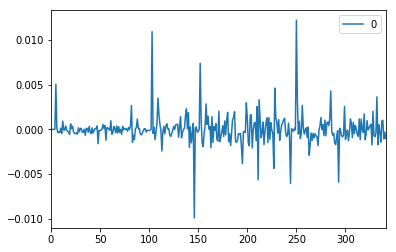

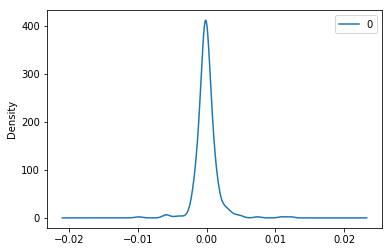

                0
count  342.000000
mean     0.000007
std      0.001668
min     -0.009912
25%     -0.000546
50%     -0.000071
75%      0.000413
max      0.012221


In [12]:
# fit model
model = ARIMA(citation_hist_all, order=(10,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [13]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# # split into train and test sets

# train, test = np.divide(citation_hist['H04N'],HH[0]), np.divide(citation_hist['H04B'],HH[0])
# # train, test = np.divide(citation_hist['H04N'],HH[0])[:-20], np.divide(citation_hist['H04B'],HH[0])[-20:]
# history = [x for x in train]
# predictions = list()
# # walk-forward validation
# for t in range(len(test)):
#     # fit model
#     model = ARIMA(history, order=(7,1,0))
#     model_fit = model.fit()
#     # one step forecast
#     yhat = model_fit.forecast()[0]
#     # store forecast and ob
#     predictions.append(yhat)
#     history.append(test[t])
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets

train, test = np.divide(citation_hist['Y02A'],YY[0])[:44], np.divide(citation_hist['Y02A'],YY[0])[44:]
# train, test = citation_hist_all, np.divide(citation_hist['Y02W'],YY[0])[30:]

model = auto_arima(train, trace=True, start_p=0, start_q=0, start_P=0,start_Q=0,
                  max_p=10, max_q=10, max_P=10,max_Q=10,seasonal=False,
                  stepwise=False,suppress_warnings=True, D=1,max_D=10,
                  error_action='ignore',approximation=False)
model.fit(train)

# history = [x for x in train]
# predictions = list()
# # walk-forward validation
# for t in range(len(test)):
#     # fit model
#     model = ARIMA(history, order=(3,1,0))
#     model_fit = model.fit()
#     # one step forecast
#     yhat = model_fit.forecast()[0]
#     # store forecast and ob
#     predictions.append(yhat)
#     history.append(test[t])
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show(

Fit ARIMA: order=(0, 1, 0); AIC=-454.357, BIC=-450.834, Fit time=0.013 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-456.253, BIC=-450.970, Fit time=0.039 seconds
Fit ARIMA: order=(0, 1, 2); AIC=-454.331, BIC=-447.287, Fit time=0.046 seconds
Fit ARIMA: order=(0, 1, 3); AIC=-452.343, BIC=-443.537, Fit time=0.137 seconds
Fit ARIMA: order=(0, 1, 4); AIC=-451.283, BIC=-440.716, Fit time=0.256 seconds
Fit ARIMA: order=(0, 1, 5); AIC=-450.811, BIC=-438.482, Fit time=0.349 seconds
Fit ARIMA: order=(0, 1, 6); AIC=-448.630, BIC=-434.541, Fit time=1.152 seconds
Fit ARIMA: order=(0, 1, 7); AIC=-451.624, BIC=-435.773, Fit time=2.425 seconds
Fit ARIMA: order=(0, 1, 8); AIC=-450.455, BIC=-432.843, Fit time=5.068 seconds
Fit ARIMA: order=(0, 1, 9); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 10); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0); AIC=-456.146, BIC=-450.862, Fit time=0.107 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-454.317, BIC=-447.273, Fit time=0.095 seco

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [59]:
y_pred = model.predict(n_periods=len(test))
from sklearn.metrics import r2_score
acc = r2_score(test,y_pred)
print(acc)

-0.4908937632312329


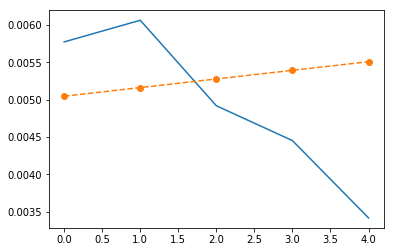

In [60]:
plt.plot(test)
plt.plot(y_pred,'o--')

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test RMSE: 0.001


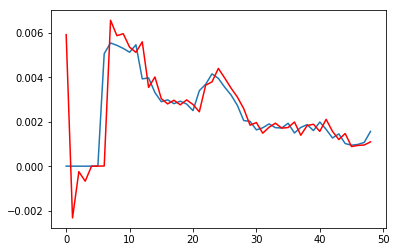

In [10]:

from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets

train, test = np.divide(citation_hist['Y02E'],YY[0]), np.divide(citation_hist['Y02W'],YY[0])
# train, test = np.divide(citation_hist['H04N'],HH[0])[:-20], np.divide(citation_hist['H04B'],HH[0])[-20:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [71]:
YR = 1
prd = {}
for key in citation_hist.keys():
    TS = list(np.divide(citation_hist[key],YY[0]))
    history = TS[:]
    predictions = []

    for t in range(YR):
        # fit model
        model = ARIMA(history, order=(5,0,0))
        model_fit = model.fit()
        # one step forecast
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(yhat)
    prd[key] = [history[-2]*(history[-1]-history[-2])/history[-2]]
prd



{'Y02B': [array([-0.00048002])],
 'Y02A': [array([-8.12554642e-05])],
 'Y02W': [array([0.00030063])],
 'Y02P': [array([8.80779622e-05])],
 'Y02E': [array([-0.0005451])],
 'Y02T': [array([-0.00050929])],
 'Y02C': [array([0.00019376])],
 'Y02D': [array([0.00214196])]}

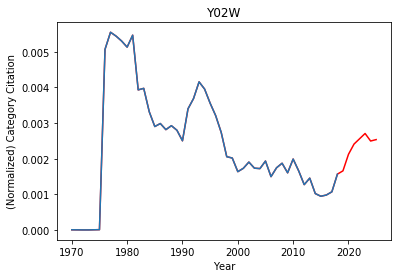

In [77]:
TS = list(np.divide(citation_hist['Y02W'],YY[0]))
history = list(np.divide(citation_hist['Y02W'],YY[0]))
predictions = []
# walk-forward validation
YR = 7
for t in range(YR):
    # fit model
    model = ARIMA(history, order=(7,0,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(yhat)

year = list(YY[1][:-1])+list(range(int(YY[1][-1]),int(YY[1][-1]+YR)))
# plot forecasts against actual outcomes
plt.plot(year,history, 'r')
plt.plot(list(YY[1][:-1]),TS)
plt.xlabel('Year')
plt.ylabel('(Normalized) Category Citation')
plt.title('Y02W')
plt.savefig(drct+'Y02E.png', bbox_inches="tight")